# ASSIGNMENT 1: SUPERVISED AND UNSUPERVISED LEARNING
This assignment will cover the various models taught in class that are regularly used for supervised and unsupervised learning.

Recall that Supervised Learning is the paradigm of machine learning that makes use of data labels for training, along with the data features, while  unsupervised relies only on data features.


**BEFORE ANYTHING, IMPORT THE NECESSARY LIBRARIES**

In [367]:
pip install scikit-learn

In [368]:
# ENTER YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## SUPERVISED LEARNING

As described in class, the datapoints used in supervised learning are associated with output labels which are used for training. The models trained are then used to predict on similar unseen data to produce similar labels.

Supervised learning is broadly divided into two parts:
- Regression: The output labels are continuous in nature.
- Classification: The output labels are discrete in nature.

We'll begin with classification. Recall some of the models taught for the same- **Logistic Regression, Support Vector Machine, KNN, Naive Bayes, Decision Trees and Random Forests**

### BINARY CLASSIFICATION

In [369]:
! gdown 1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP

Downloading...
From: https://drive.google.com/uc?id=1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP
To: /content/nba_logreg.csv
100% 129k/129k [00:00<00:00, 87.3MB/s]


**Import the csv file `NBA_logreg.csv` as a Pandas dataframe.**

In [370]:
# ENTER YOUR CODE HERE
nba=pd.read_csv('/content/nba_logreg.csv')
nba

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


**Lets analyse the data a tiny bit!**

**What are the no. of rows and columns in the dataset?**

In [371]:
#ENTER YOUR CODE HERE

In [372]:
rows=nba.shape[0]
print(rows)

1340


**What are the columns?**

In [373]:
#ENTER YOUR CODE HERE

In [374]:
cols=nba.shape[1]
print(cols)

21


**What does the beginning of the dataset look like?**

In [375]:
#ENTER YOUR CODE HERE

In [376]:
nba

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


In [377]:
from sklearn import preprocessing
lable_encoder=preprocessing.LabelEncoder()
nba['Name']=lable_encoder.fit_transform(nba['Name'])

Actually, the given dataset describes the player history of several NBA players. The column 'TARGET_5yrs' only contains the values 0 and 1, with 0 standing for players who played for less than 5 years, and 1 for players who played for more than or equal to 5 years. Thus, 0 and 1 stand for 2 classes- binary classification!

**Clean the dataset. Drop the NaN values!**



In [378]:
#ENTER YOUR CODE HERE

In [379]:
nba.dropna(inplace=True)

**What is the shape of the dataframe now?**

In [380]:
#ENTER YOUR CODE HERE

In [381]:
nba.shape

(1329, 21)

**For training, first create a dataframe that stores the columns to be used for training, and another dataframe that stores the labels.**

In [382]:
#ENTER YOUR CODE HERE

In [383]:
a=nba['TARGET_5Yrs']
b=nba.drop(['TARGET_5Yrs'],axis=1)

It is considered best practice to divide the dataset into two parts- test and train(Search the internet for the reason- we'll ask in class :)).

**Import the sklearn module that allows us to split the dataset into train and test.**

In [384]:
#ENTER YOUR CODE HERE
from sklearn.model_selection import train_test_split

**Now divide the features and label dataframes into train and test splits.**

In [385]:
#ENTER YOUR CODE HERE

In [386]:
a_train, a_test, b_train, b_test = train_test_split(a,b , random_state=1040,test_size=0.25, shuffle=True)
a_train.shape, a_test.shape, b_train.shape, b_test.shape

((996,), (333,), (996, 20), (333, 20))

**Now load the sklearn module that allows the creation of a logistic regression model.**

In [387]:
#ENTER YOUR CODE HERE
from sklearn import linear_model
logr = linear_model.LogisticRegression()

**Onto training! Train the a logistic regression model using the training features and labels dataframes.**

In [388]:
#ENTER YOUR CODE HERE


In [389]:
logr.fit(b,a)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Your model is trained! Time to check how good it is by using it on the testing dataframe.
Some metrics are used to check the reliability of a model.

**As an exercise, read about these and fill out the markdown below!**


- Accuracy:
- F1 score:
- Precision:
- Recall:

All of these can be calculated for our model using sklearn modules.

**Import them!**

In [390]:
#ENTER YOUR CODE HERE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
a_pred=logr.predict(b_test)


**Now test on the testing dataframe and print all of these metrics.**

In [391]:
#ENTER YOUR CODE HERE

In [392]:
accuracy=metrics.accuracy_score(a_pred,a_test)
f1_score=metrics.f1_score(a_pred,a_test)
precision = precision_score(a_test, a_pred, average='binary')
recall = recall_score(a_test, a_pred, average='binary')
print(accuracy)
print(f1_score)
print(precision)
print(recall)

0.6996996996996997
0.7663551401869159
0.7224669603524229
0.8159203980099502


**Your Logistic Regression model is well trained!**

Support Vector Machine is another model that can be used both for regression and classification. We'll be training a classification model on our current dataset.

**Import the sklearn module that is used to implement a classification SVM**

In [393]:
#ENTER YOUR CODE HERE
from sklearn import svm

**Just as we had before, load and fit a model on our training dataset.**

In [394]:
#ENTER YOUR CODE HERE
svm_model = svm.SVC()
svm_model.fit(b_train,a_train)

SVC()

**Now test the model on the training dataset, and check the relevant metrics!**

In [395]:
#ENTER YOUR CODE HERE

In [396]:
svm_pred=svm_model.predict(b_test)
a_svm=metrics.accuracy_score(svm_pred,a_test)
f1_svm=metrics.f1_score(svm_pred,a_test)
pre_svm = precision_score(a_test, svm_pred, average='binary')
recall_svm = recall_score(a_test, svm_pred, average='binary')
print(a_svm)
print(f1_svm)
print(pre_svm)
print(recall_svm)

0.6036036036036037
0.752808988764045
0.6036036036036037
1.0


### MULTICLASS CLASSIFICATION

In [397]:
! gdown 1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC

Downloading...
From: https://drive.google.com/uc?id=1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC
To: /content/social_well_being.csv
100% 43.1k/43.1k [00:00<00:00, 73.0MB/s]


**Import the csv `social_well_being.csv` as a pandas dataframe.**

In [398]:
#ENTER YOUR CODE HERE
data=pd.read_csv('social_well_being.csv')

**Always analyse the data.**

In [399]:
#ENTER YOUR CODE HERE
data


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom
...,...,...,...,...,...,...,...,...,...,...
919,996,33,Non-binary,Twitter,85,4,35,18,18,Boredom
920,997,22,Female,Facebook,70,1,14,6,10,Neutral
921,998,35,Male,Whatsapp,110,3,50,25,25,Happiness
922,999,28,Non-binary,Telegram,60,2,18,8,18,Anger


In [400]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     924 non-null    int64 
 1   Age                         924 non-null    int64 
 2   Gender                      924 non-null    object
 3   Platform                    924 non-null    object
 4   Daily_Usage_Time (minutes)  924 non-null    int64 
 5   Posts_Per_Day               924 non-null    int64 
 6   Likes_Received_Per_Day      924 non-null    int64 
 7   Comments_Received_Per_Day   924 non-null    int64 
 8   Messages_Sent_Per_Day       924 non-null    int64 
 9   Dominant_Emotion            924 non-null    object
dtypes: int64(7), object(3)
memory usage: 72.3+ KB


In [401]:
data.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [402]:
data

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom
...,...,...,...,...,...,...,...,...,...,...
919,996,33,Non-binary,Twitter,85,4,35,18,18,Boredom
920,997,22,Female,Facebook,70,1,14,6,10,Neutral
921,998,35,Male,Whatsapp,110,3,50,25,25,Happiness
922,999,28,Non-binary,Telegram,60,2,18,8,18,Anger


Since its multiclass-classification, the classes column 'Dominant_Emotion' has more than two classes.

**Can you find out what these classes are?**

In [403]:
#ENTER YOUR CODE HERE

In [404]:
data['Dominant_Emotion'].unique()

array(['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness'],
      dtype=object)

Actually this isn't the only categorical column in the dataset. There are other too.

**Print their values as well!**

In [405]:
#ENTER YOUR CODE HERE
data


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom
...,...,...,...,...,...,...,...,...,...,...
919,996,33,Non-binary,Twitter,85,4,35,18,18,Boredom
920,997,22,Female,Facebook,70,1,14,6,10,Neutral
921,998,35,Male,Whatsapp,110,3,50,25,25,Happiness
922,999,28,Non-binary,Telegram,60,2,18,8,18,Anger


In [406]:
print(data['Gender'].unique())
data['Dominant_Emotion'].unique()

['Female' 'Male' 'Non-binary']


array(['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness'],
      dtype=object)

Many models, including KNN, will only work with numerical data. Hence the textual categories need to go. We will use something called "one-hot encoding" for transforming our features and "labelling" for our categories.

**Import the pandas module used for one-hot encoding**

In [407]:
#ENTER YOUR CODE HERE

**First One-Hot Encode the 'Gender' column and replace the 'Gender' column with this.**

In [408]:
#ENTER YOUR CODE HERE
one_hot_encoded_gender = pd.get_dummies(data, columns = ['Gender'],dtype='int')

In [409]:
one_hot_encoded_gender

,User_ID,Age,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Gender_Female,Gender_Male,Gender_Non-binary
0,1,25,Instagram,120,3,45,10,12,Happiness,1,0,0
1,2,30,Twitter,90,5,20,25,30,Anger,0,1,0
2,3,22,Facebook,60,2,15,5,20,Neutral,0,0,1
3,4,28,Instagram,200,8,100,30,50,Anxiety,1,0,0
4,5,33,LinkedIn,45,1,5,2,10,Boredom,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,Twitter,85,4,35,18,18,Boredom,0,0,1
920,997,22,Facebook,70,1,14,6,10,Neutral,1,0,0
921,998,35,Whatsapp,110,3,50,25,25,Happiness,0,1,0
922,999,28,Telegram,60,2,18,8,18,Anger,0,0,1


**Repeat the drill for the column 'Platform'.**

In [410]:
#ENTER YOUR CODE HERE
one_hot_encoded_platform=pd.get_dummies(one_hot_encoded_gender,columns=['Platform'],dtype='int')

In [411]:
one_hot_encoded_platform

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Gender_Female,Gender_Male,Gender_Non-binary,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,1,25,120,3,45,10,12,Happiness,1,0,0,0,1,0,0,0,0,0
1,2,30,90,5,20,25,30,Anger,0,1,0,0,0,0,0,0,1,0
2,3,22,60,2,15,5,20,Neutral,0,0,1,1,0,0,0,0,0,0
3,4,28,200,8,100,30,50,Anxiety,1,0,0,0,1,0,0,0,0,0
4,5,33,45,1,5,2,10,Boredom,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,Boredom,0,0,1,0,0,0,0,0,1,0
920,997,22,70,1,14,6,10,Neutral,1,0,0,1,0,0,0,0,0,0
921,998,35,110,3,50,25,25,Happiness,0,1,0,0,0,0,0,0,0,1
922,999,28,60,2,18,8,18,Anger,0,0,1,0,0,0,0,1,0,0


Last categorical feature is our label column.

**Import the module used for label encoding.**

In [412]:
#ENTER YOUR CODE HERE
import sklearn
from sklearn import preprocessing

**Now label encode the column 'Dominant_Emotion'**

In [413]:
#ENTER YOUR CODE HERE

In [414]:
lable_encoder=preprocessing.LabelEncoder()
one_hot_encoded_platform['Dominant_Emotion']=lable_encoder.fit_transform(data['Dominant_Emotion'])
one_hot_encoded_platform['Dominant_Emotion'].unique()

array([3, 0, 4, 1, 2, 5])

Now we have only numerical data, phew! Lets start training!

**Create the freatures dataframe and the labels dataframe as we had done before, and split them into train and test parts. Do you need to import the libraries again?**

In [415]:
one_hot_encoded_platform.head()

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Gender_Female,Gender_Male,Gender_Non-binary,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,1,25,120,3,45,10,12,3,1,0,0,0,1,0,0,0,0,0
1,2,30,90,5,20,25,30,0,0,1,0,0,0,0,0,0,1,0
2,3,22,60,2,15,5,20,4,0,0,1,1,0,0,0,0,0,0
3,4,28,200,8,100,30,50,1,1,0,0,0,1,0,0,0,0,0
4,5,33,45,1,5,2,10,2,0,1,0,0,0,1,0,0,0,0


In [416]:
#ENTER YOUR CODE HERE


In [417]:
y=one_hot_encoded_platform['Dominant_Emotion']
x=one_hot_encoded_platform.drop(['User_ID','Dominant_Emotion'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y , random_state=1040,test_size=0.25, shuffle=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((693, 16), (231, 16), (693,), (231,))

**Import the module used for training a KNN model.**

In [418]:
#ENTER YOUR CODE HERE
import sklearn
from sklearn.neighbors import KNeighborsClassifier

**Train your model.**

In [419]:
#ENTER YOUR CODE HERE
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)



KNeighborsClassifier(n_neighbors=7)

**Create and print the Prediction Dataframe.**

In [420]:
#ENTER YOUR CODE HERE
y_pred=knn.predict(x_test)
pred = pd.DataFrame(y_pred, columns=['Predicted'])


I'm guessing you notice the issue. These are not our original labels!

**Tranform these labels using the encoder you had created while encoding 'Dominant_Emotion'.**

In [421]:
#ENTER YOUR CODE HERE

In [422]:
pred['Predicted'] = lable_encoder.inverse_transform(pred['Predicted'])
pred

,Predicted
0,Boredom
1,Sadness
2,Anger
3,Neutral
4,Sadness
...,...
226,Happiness
227,Anxiety
228,Boredom
229,Happiness


**Now print the relevant metrics! Don't forget to get original y_test first!**

In [423]:
#ENTER YOUR CODE HERE

In [424]:
knn.score(x_test,y_test)

0.9523809523809523

**That's a good model!**

Since it's multi-class classification, traditional metrics like precision and recall won't work. We'll judge our model using a confusion matrix and classification report!

**Import the module for confusion matrix and classification report, and print them.**

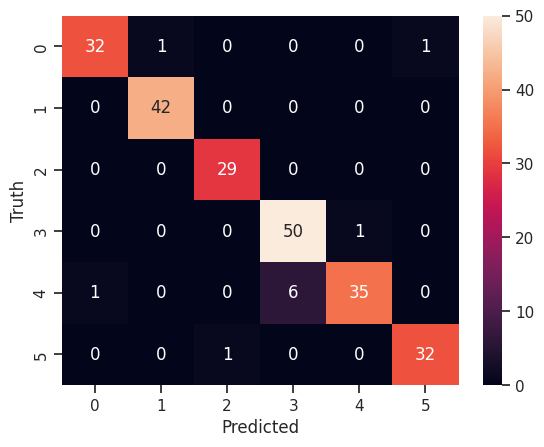

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        34
           1       0.98      1.00      0.99        42
           2       0.97      1.00      0.98        29
           3       0.89      0.98      0.93        51
           4       0.97      0.83      0.90        42
           5       0.97      0.97      0.97        33

    accuracy                           0.95       231
   macro avg       0.96      0.95      0.95       231
weighted avg       0.95      0.95      0.95       231



In [425]:

#ENTER YOUR CODE HERE
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print(classification_report(y_test,y_pred))

We already have our training and test datasets ready, lets train some other models.

**Import Naive Bayes**

In [426]:
#ENTER YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB

**Now instantiate and fit a model.**

In [427]:
#ENTER YOUR CODE HERE
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

**Predict on the test features, and dont forget to inverse transform!**

In [428]:
#ENTER YOUR CODE HERE
model.predict(x_test)

array([0, 2, 2, 2, 0, 3, 3, 3, 0, 3, 2, 0, 0, 0, 0, 2, 3, 0, 3, 3, 0, 0,
       2, 5, 0, 3, 0, 2, 3, 3, 2, 2, 2, 0, 0, 0, 0, 2, 3, 2, 2, 2, 2, 2,
       2, 3, 3, 5, 0, 5, 2, 0, 2, 3, 3, 2, 3, 2, 2, 0, 2, 5, 0, 3, 2, 0,
       0, 3, 2, 2, 2, 2, 0, 3, 3, 3, 0, 2, 2, 3, 2, 3, 3, 3, 0, 2, 3, 0,
       0, 3, 2, 3, 0, 2, 0, 3, 2, 3, 2, 2, 2, 2, 0, 0, 0, 3, 2, 2, 5, 2,
       2, 3, 3, 2, 5, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 2, 3, 2, 3, 3, 2,
       0, 2, 2, 2, 0, 3, 5, 2, 3, 3, 3, 2, 3, 2, 2, 0, 0, 2, 3, 0, 0, 2,
       2, 2, 3, 2, 2, 2, 2, 3, 2, 0, 2, 3, 2, 0, 0, 0, 0, 0, 3, 3, 5, 0,
       3, 2, 2, 2, 3, 0, 0, 3, 0, 3, 0, 2, 0, 2, 3, 2, 3, 3, 5, 5, 0, 2,
       0, 3, 3, 3, 0, 0, 5, 0, 0, 3, 2, 0, 0, 3, 3, 3, 2, 0, 5, 2, 0, 0,
       0, 3, 5, 0, 0, 2, 3, 0, 2, 3, 3])

**Finally, print the accuracy, confusion matrix and classification report.**

In [429]:

#ENTER YOUR CODE HERE
model.score(x_test,y_test)

0.46320346320346323

Text(46.25, 0.5, 'Truth')

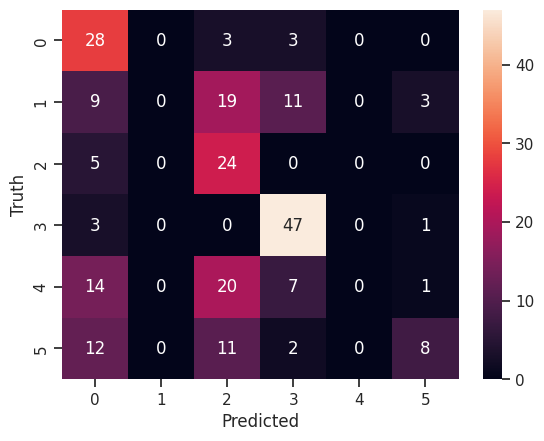

In [430]:

cm_m=confusion_matrix(y_test,model.predict(x_test))
sns.heatmap(cm_m,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Now train a 'Decision Tree' and a 'Random Forest Generator' for the same classification problem.Feel free to play with the hyperparameters!

### Report the accuracy score for each!

In [431]:
# DECISION TREE

In [432]:
from sklearn.tree import DecisionTreeRegressor

In [433]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [434]:
d_pred=regressor.predict(x_test)
pred_d = pd.DataFrame(d_pred, columns=['Predicted'])
# pred_d['Predicted'] = lable_encoder.inverse_transform(pred_d['Predicted'])
pred

,Predicted
0,Boredom
1,Sadness
2,Anger
3,Neutral
4,Sadness
...,...
226,Happiness
227,Anxiety
228,Boredom
229,Happiness


In [435]:
regressor.score(x_test,y_test)

0.91393561384868

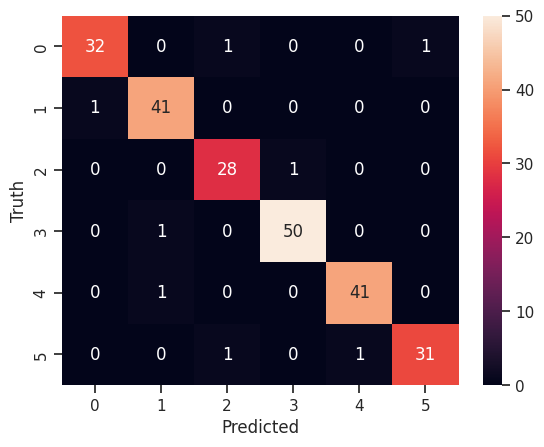

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        34
           1       0.95      0.98      0.96        42
           2       0.93      0.97      0.95        29
           3       0.98      0.98      0.98        51
           4       0.98      0.98      0.98        42
           5       0.97      0.94      0.95        33

    accuracy                           0.97       231
   macro avg       0.96      0.96      0.96       231
weighted avg       0.97      0.97      0.97       231



In [436]:
cm_d=confusion_matrix(y_test,d_pred)
sns.heatmap(cm_d,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print(classification_report(y_test,d_pred))

In [437]:
# RANDOM FOREST GENERATOR

In [438]:
from sklearn.ensemble import RandomForestClassifier

In [439]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)
r_pred = clf.predict(x_test)

In [440]:
clf.score(x_test,y_test)

0.987012987012987

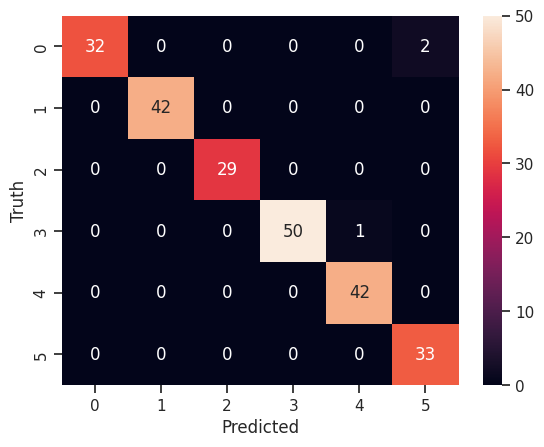

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        29
           3       1.00      0.98      0.99        51
           4       0.98      1.00      0.99        42
           5       0.94      1.00      0.97        33

    accuracy                           0.99       231
   macro avg       0.99      0.99      0.99       231
weighted avg       0.99      0.99      0.99       231



In [441]:
cm_r=confusion_matrix(y_test,r_pred)
sns.heatmap(cm_r,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print(classification_report(y_test,r_pred))

### REGRESSION


In [442]:
! gdown 1lSdE2FDZbZ-w0JZ9fJBqC3l9EQwO9YLX

Downloading...
From: https://drive.google.com/uc?id=1lSdE2FDZbZ-w0JZ9fJBqC3l9EQwO9YLX
To: /content/IPL 2022 Batters.csv
100% 7.91k/7.91k [00:00<00:00, 22.1MB/s]


**Import the csv `IPL 2022 Batters.csv` as a pandas dataframe.**

In [443]:
#ENTER YOUR CODE HERE
ipl=pd.read_csv('/content/IPL 2022 Batters.csv')

**First things first, analyze the data**

In [444]:
#ENTER YOUR CODE HERE

In [445]:
ipl.head(50)

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s
0,Jos Buttler,17,17,2,863,116,57.53,579,149.05,4,4,83
1,K L Rahul,15,15,3,616,103*,51.33,455,135.38,2,4,45
2,Quinton De Kock,15,15,1,508,140*,36.29,341,148.97,1,3,47
3,Hardik Pandya,15,15,4,487,87*,44.27,371,131.26,0,4,49
4,Shubman Gill,16,16,2,483,96,34.5,365,132.32,0,4,51
5,David Miller,16,16,9,481,94*,68.71,337,142.72,0,2,32
6,Faf Du Plessis,16,16,1,468,96,31.2,367,127.52,0,3,49
7,Shikhar Dhawan,14,14,2,460,88*,38.33,375,122.66,0,3,47
8,Sanju Samson,17,17,1,458,55,28.63,312,146.79,0,2,43
9,Deepak Hooda,15,14,0,451,59,32.21,330,136.66,0,4,36


**Use a function to find out about the datatypes of the features**

In [446]:
#ENTER YOUR CODE HERE

In [447]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  162 non-null    object 
 1   Mat     162 non-null    int64  
 2   Inns    162 non-null    int64  
 3   NO      162 non-null    int64  
 4   Runs    162 non-null    int64  
 5   HS      162 non-null    object 
 6   Avg     162 non-null    object 
 7   BF      162 non-null    int64  
 8   SR      162 non-null    float64
 9   100     162 non-null    int64  
 10  50      162 non-null    int64  
 11  4s      162 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 15.3+ KB


**Interestingly, not all features are numerical !**

Drop the irrelevant features and convert the non numerical features in to numerical ones by some procedure

In [448]:
values = []
for i,val in enumerate(ipl['Avg'].values) :
  if val == '-' :
    values.append(0)
  else :
    values.append(float(val))

ipl['Avg'] = values

In [449]:
values = []
for value in ipl['HS'].values :
  if value[-1] == '*' :
    value = value[:-1]
  values.append(int(value))

ipl['HS'] = values

In [450]:
ipl = ipl.drop(["Player"], axis = 1)

**Print the head to get a look at the data again**

In [451]:
#ENTER YOUR CODE HERE

In [452]:
ipl

,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s
0,17,17,2,863,116,57.53,579,149.05,4,4,83
1,15,15,3,616,103,51.33,455,135.38,2,4,45
2,15,15,1,508,140,36.29,341,148.97,1,3,47
3,15,15,4,487,87,44.27,371,131.26,0,4,49
4,16,16,2,483,96,34.50,365,132.32,0,4,51
...,...,...,...,...,...,...,...,...,...,...,...
157,3,1,1,2,2,0.00,8,25.00,0,0,0
158,5,2,0,2,2,1.00,8,25.00,0,0,0
159,9,5,1,2,1,0.50,12,16.66,0,0,0
160,1,1,1,1,1,0.00,2,50.00,0,0,0


**Check for null values and drop them if found**

In [453]:
#ENTER YOUR CODE HERE
ipl.isnull().sum()

Mat     0
Inns    0
NO      0
Runs    0
HS      0
Avg     0
BF      0
SR      0
100     0
50      0
4s      0
dtype: int64

**Examine the shape of the dataset**

In [454]:
#ENTER YOUR CODE HERE

In [455]:
ipl.shape

(162, 11)

**Separate the features and the target label**

What type of target features are associated with a Regression task ?

Continuous ones, yes. In this dataset, all the features are continuous ones. Let's pick the number of 4s as the prediction target for now.

In [456]:
#ENTER YOUR CODE HERE
c=ipl['4s']
d=ipl.drop(['4s'],axis=1)

**Split the dataset into training set and testing set**

Pick a suitable test size

In [457]:
#ENTER YOUR CODE HERE
d_train, d_test, c_train, c_test = train_test_split(d,c , random_state=1040,test_size=0.25, shuffle=True)
d_train.shape, d_test.shape, c_train.shape, c_test.shape

((121, 10), (41, 10), (121,), (41,))

**Import Linear Regression from sklearn**

In [458]:
#ENTER YOUR CODE HERE
from sklearn.linear_model import LinearRegression

**Create a model**

In [459]:
#ENTER YOUR CODE HERE
regr = LinearRegression()

**Use this model to fit on training data**

In [460]:
#ENTER YOUR CODE HERE

In [461]:
regr.fit(d_train, c_train)

LinearRegression()

**Time to get some predictions**

In [462]:
#ENTER YOUR CODE HERE

In [463]:
l_pred=regr.predict(d_test)
pred_l = pd.DataFrame(l_pred, columns=['Predicted'])
pred_l

,Predicted
0,8.978262
1,2.095889
2,2.023676
3,1.196960
4,2.781609
5,1.068407
6,28.433895
7,1.719859
8,4.690346
9,42.140736


**Find the MSE,MAE and RMSE for the model**

As an exercise, briefly write about these metrics below

MSE : The Mean Squared Error (MSE) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value.

RMSE : RMSE is the square root of the MSE and provides a measure of the magnitude of the error.

MAE : Mean absolute error, abbreviated as MAE, is a metric used to measure the average absolute difference between the predicted and actual values in a regression problem i.e. modeling various relations of variables.

In [464]:
#ENTER YOUR CODE HERE

In [465]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(c_test, l_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(c_test, l_pred)
print(mse)
print(rmse)
print(mae)

9.203606398821789
3.033744616611917
2.188387679820698


**There you have it, your first regression model is ready!**

## UNSUPERVISED LEARNING

In [466]:
! gdown 1KpPxlEvltC7qn7AJk8wqO3-_7jzsy8yw

Downloading...
From: https://drive.google.com/uc?id=1KpPxlEvltC7qn7AJk8wqO3-_7jzsy8yw
To: /content/iris.csv
100% 2.47k/2.47k [00:00<00:00, 9.11MB/s]


**Load the iris dataset**

In [467]:
#ENTER YOUR CODE HERE
iris=pd.read_csv('iris.csv')

**No need to mention what to do next :)**

In [468]:
#ENTER YOUR CODE HERE

In [469]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [470]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**Plot pairwise plot to see relations between the features**

Hint : Use the seaborn library for pairplots

In [471]:
#ENTER YOUR CODE HERE

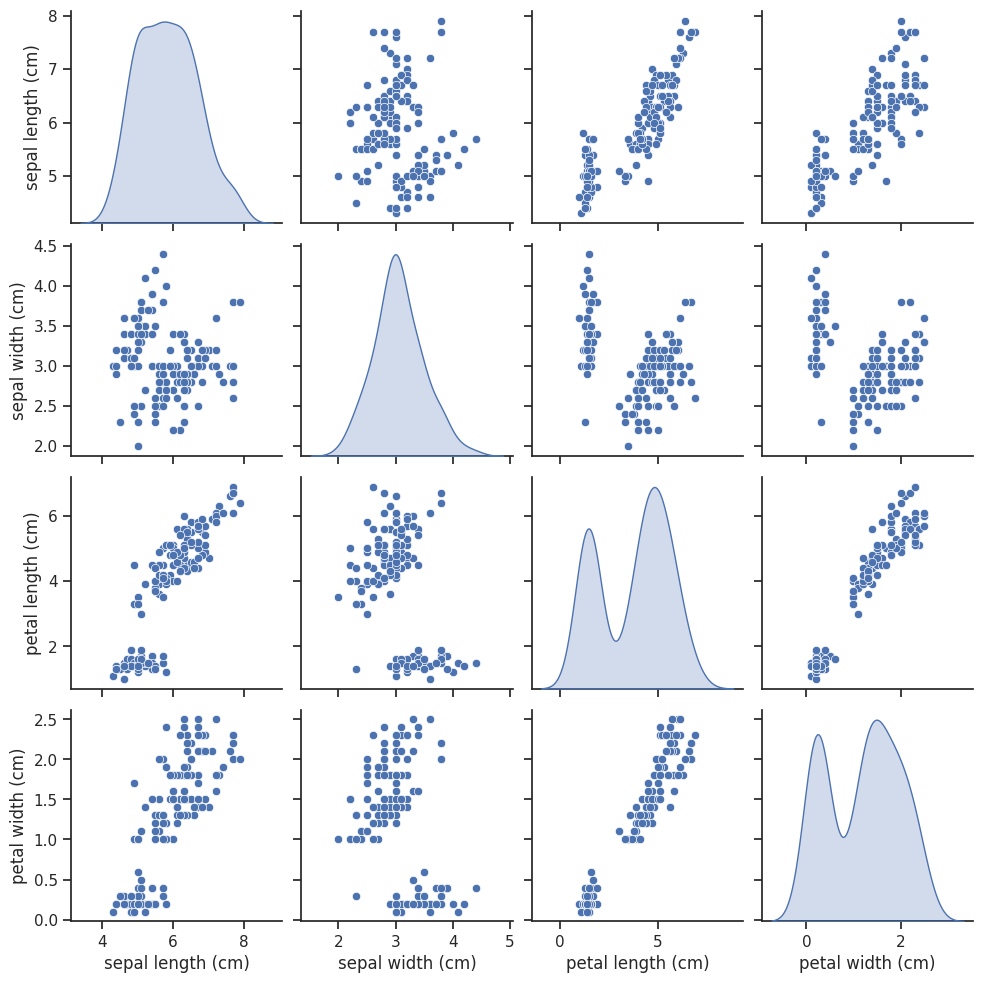

In [472]:
sns.pairplot(iris, diag_kind='kde')
plt.show()

As apparent, there is no label assigned to these entries

**Therefore let us try to Cluster the data to see any similarities**

**Import KMeans from sklearn**

In [473]:
#ENTER YOUR CODE HERE
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris

**Perform K Means Clustering**

In [474]:
#ENTER YOUR CODE HERE
data_iris=pd.DataFrame(load_iris().data,columns=load_iris().feature_names)
data_iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [475]:
target=pd.DataFrame(load_iris().target,columns=['target'])
target['target'].value_counts()
data_iris['target']=target
data_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


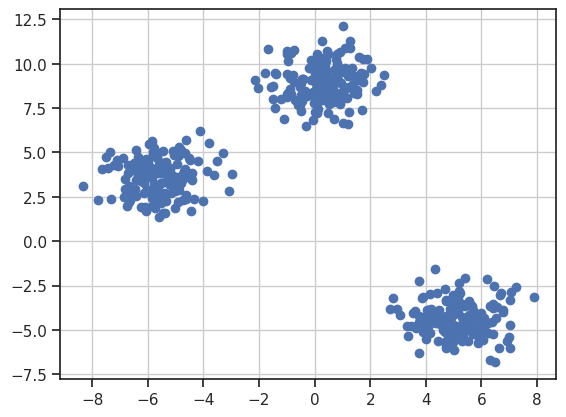

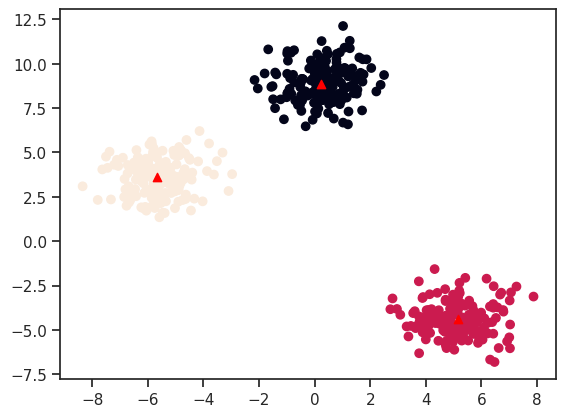

In [476]:
# X, y = load_iris(return_X_y=True)
# sse = []
# for k in range(1,11):
#     km = KMeans(n_clusters=k, random_state=2)
#     km.fit(X)
#     sse.append(km.inertia_)
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

clusters


def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []

        curr_x = X[idx]

        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

#Implementing the M-Step
def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
    return clusters


def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred


clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)


plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

**Add cluster labels to the DataFrame**

In [477]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_iris)


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)
cluster_labels = kmeans.predict(scaled_features)


data_iris['cluster'] = cluster_labels

print(data_iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  cluster  
0   

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Analyse the clusters, find the centers and the number of observations in each cluster**

In [478]:
#ENTER YOUR CODE HERE
cluster_centers = kmeans.cluster_centers_
cluster_counts = data_iris['cluster'].value_counts()
original_cluster_centers = scaler.inverse_transform(cluster_centers)

**Visualise the cluster, make the plot again but this time with labels**

In [479]:
#ENTER YOUR CODE HERE

# GOOD JOB!